In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [4]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.replace('?', np.nan, inplace=True)

# Convert all columns to numeric where possible
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with missing values
df.dropna(inplace=True)


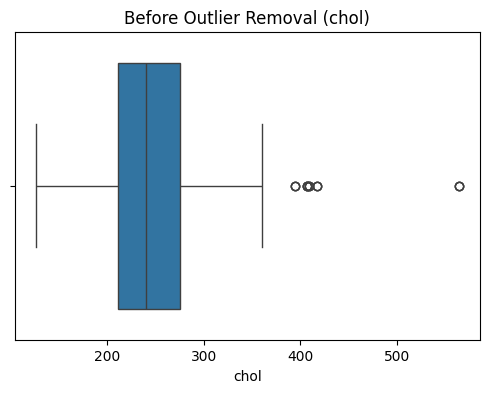

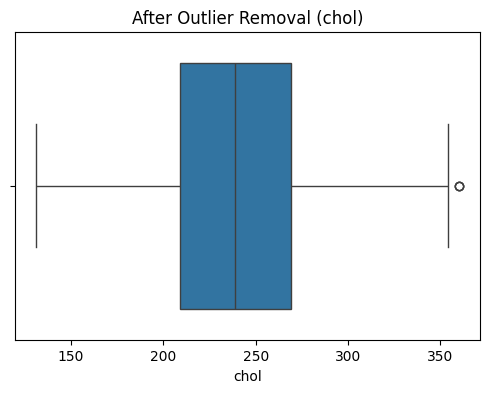

In [6]:
# Remove negative values in numeric columns except for 'oldpeak' (can be 0 or positive)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != 'target' and col != 'oldpeak']
df = df[(df[numeric_cols] >= 0).all(axis=1)]

# ------------------ Outlier Detection and Removal ------------------

# Boxplot before outlier removal (example: chol)
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["chol"])
plt.title("Before Outlier Removal (chol)")
plt.show()

# Remove outliers using IQR
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

# Boxplot after outlier removal (example: chol)
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["chol"])
plt.title("After Outlier Removal (chol)")
plt.show()


In [12]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Rename target column if not already
if 'target' not in df.columns:
    df.rename(columns={df.columns[-1]: 'target'}, inplace=True)

# Feature-target split
X = df.drop('target', axis=1)
y = df['target']

# Normalize numerical features
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])

# ------------------ Model Building and Accuracy Comparison ------------------

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_acc = accuracy_score(y_test, log_model.predict(X_test))

# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_acc = accuracy_score(y_test, knn_model.predict(X_test))

# ------------------ Results ------------------
print("Logistic Regression Accuracy:", round(log_acc, 4))
print("K-Nearest Neighbors Accuracy:", round(knn_acc, 4))
print("Accuracy Difference (LogReg - KNN):", round(log_acc - knn_acc, 4))

Logistic Regression Accuracy: 0.8774
K-Nearest Neighbors Accuracy: 0.8194
Accuracy Difference (LogReg - KNN): 0.0581
